In [1]:
def redondeoDecimalesSignificativos(numero, n_decimales=2):
    """
    Redondea un número a un número específico de decimales significativos,
    asegurando que al menos `n_decimales` dígitos se muestren después del punto decimal.

    Args:
        numero (float): El número a redondear.
        n_decimales (int, opcional): El número mínimo de decimales que se mostrarán.
                                      Debe ser un entero positivo. Por defecto es 2.

    Returns:
        str: El número redondeado formateado como una cadena.
             Retorna "-1" si el número no es decimal o si todos los dígitos decimales son cero.
    """
    numero_str = str(numero)

    if '.' not in numero_str:
        return "-1"  # No es un número decimal
    
    decimales = numero_str[numero_str.index('.') + 1:]

    primer_no_cero_encontrado = False
    posicion_no_cero = 0

    for i, digito in enumerate(decimales):
        if digito != '0':
            primer_no_cero_encontrado = True
            posicion_no_cero = i
            break  # Salir del bucle al encontrar el primer dígito no cero

    if not primer_no_cero_encontrado:
        return "-1"  # Todos los dígitos decimales son cero

    # Calcular la precisión (número total de decimales a mostrar)
    precision = posicion_no_cero + n_decimales

    # Formatear el número con la precisión calculada
    return f"{numero:.{precision}f}"


## Scripts QUBO 
Este cuaderno, reune código básico para ejecutar problemas QUBO (Quadratic Unconstrained Binary Optimization) en ordenadores cuánticos de annealing, como D-Wave. Se utilizan las bibliotecas `pyqubo` y `neal` para definir y resolver estos problemas. 

A continuación, se muestra un ejemplo de cómo definir un problema QUBO, compilarlo, convertirlo a un modelo binario cuadrático y resolverlo utilizando un simulador de annealing simulado.

In [ ]:
import neal
from pyqubo import Binary

a, b = Binary('a'), Binary('b')
H = 2*a +3*b*a -2*(a*b+1)**2
model = H.compile()
bqm = model.to_bqm()
sampler = neal.SimulatedAnnealingSampler()
sampleset = sampler.sample(bqm, num_reads=10)
decoded_samples = model.decode_sampleset(sampleset)
best_sample = min(decoded_samples, key=lambda x: x.energy)
print(best_sample.sample)
print(best_sample.energy)
print(best_sample.constraints())

## **Ejemplo 1.1: Mayor ejército posible**

Sean cinco pueblos, cada uno con un ejército. Nosotros somos el Imperio Romano y queremos conquistar el territorio. Para ello, debemos crear alianzas con los pueblos y obtener el máximo número de soldados posible.

### Número de soldados por pueblo

| Pueblo   | Nº Soldados |
|----------|------------|
| Pueblo 1 | 100        |
| Pueblo 2 | 60         |
| Pueblo 3 | 180        |
| Pueblo 4 | 40         |
| Pueblo 5 | 70         |

Hay que tener en cuenta que existen tensiones entre pueblos y, por lo tanto, sus soldados no querrán estar en el mismo ejército.

### Pueblos enemigos

| Pueblo  | Enemigo     |
|---------|------------|
| Pueblo 1 → | Pueblo 4 |
| Pueblo 3 → | Pueblo 5 |
| Pueblo 4 → | Pueblo 3 |
| Pueblo 5 → | Pueblo 1 |

**¿A qué pueblos tengo que mandar una solicitud de alianza para conseguir el mayor ejército posible?**


### _Resolución:_

Se quiere maximizar el número de soldados reclutados, lo cual es equivalente a maximizar el número de solicitudes aceptadas por los pueblos. Se considera la variable binaria \( x_i \):

### Definición de \( x_i \)

| \( x_i \)  | Significado            |
|------------|------------------------|
| \( x_i = 1 \) | Solicitud aceptada  |
| \( x_i = 0 \) | Solicitud denegada  |

Modelicemos el problema como un **grafo** para poder visualizar la situación.


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

from pyqubo import Binary
import neal

import numpy as np
import time

In [8]:
def crearGrafo(dic_nodos, dic_aristas, titulo):
    # Crear el grafo
    G = nx.Graph()

    # Agregar todos los nodos (para evitar que falten pueblos sin enemigos)
    G.add_nodes_from(dic_nodos.keys())

    # Agregar aristas según las enemistades
    for pueblo, enemigo in dic_aristas.items():
        G.add_edge(pueblo, enemigo)

    # Definir posiciones de los nodos en la visualización.
    n = len(dic_nodos)
    radio = 1
    posiciones = {}
    for i in range(n):
        angulo = 2 * np.pi * i / n  # Ángulo en radianes
        x = -radio * np.cos(angulo)
        y = radio * np.sin(angulo)
        posiciones[str(i+1)] = (x, y)  # Usamos 

    # Opciones de dibujo
    options = {
        "font_size": 12,
        "node_size": 1500,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 2,
        "width": 1,
        "with_labels": True,
        "labels": dic_nodos
        
    }

    # Dibujar el grafo
    nx.draw_networkx(G, posiciones, **options)

    # Ajustes finales
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    plt.title(titulo)
    plt.show()

def matrizHamiltoniano(eliminar_bajo_diagonal =True):
    """Muestra la matriz QUBO y los detalles del Hamiltoniano."""
    
    Q, lineal, interacciones, offset = crearMatrizHamiltoniano(bqm, eliminar_bajo_diagonal)
    
    
    # Configurar la visualización de matrices sin mostrar decimales innecesarios
    np.set_printoptions(precision=2, suppress=True)

    # Mostrar la matriz QUBO
    print("Matriz QUBO:")
    print("-------------------------")
    print(Q)
    print("")

    # Mostrar el Hamiltoniano del sistema
    print("HAMILTONIANO DEL SISTEMA:")
    print("-------------------------")
    
    # Formatear los términos lineales para eliminar decimales innecesarios
    print("Término lineal:", {var: f"{val:.2f}" if val % 1 != 0 else f"{int(val)}" for var, val in sorted(lineal.items())})
    
    # Formatear los términos cuadráticos
    print("Términos cuadráticos:", {(var1, var2): f"{val:.2f}" if val % 1 != 0 else f"{int(val)}" for (var1, var2), val in interacciones.items()})
    
    # Formatear el offset
    print("Offset:", f"{offset:.2f}" if offset % 1 != 0 else f"{int(offset)}")
    print("")

def crearMatrizHamiltoniano(bqm, eliminar_bajo_diagonal):
    """Crea la matriz QUBO utilizando los términos lineales y cuadráticos del BQM.
    
    Si `eliminar_bajo_diagonal` es True, se eliminan los valores debajo de la diagonal.
    """
    variables = sorted(bqm.variables)
    var_index = {var: i for i, var in enumerate(variables)}
    lineal = bqm.linear
    sorted_lineal = {var: lineal[var] for var in variables}
    interacciones = bqm.quadratic
    n = len(bqm.variables)
    
    # Crear la matriz de ceros
    Q = np.zeros((n, n))

    # Crear la lista de valores lineales en función del índice de las variables
    diagonal_values = [lineal[var] for var in variables]  # Ordena las variables antes de asignar valores

    # Comprobamos si el número de valores lineales coincide con el tamaño de la matriz Q
    if len(diagonal_values) == Q.shape[0]:
        np.fill_diagonal(Q, diagonal_values)
    else:
        raise ValueError("El número de valores lineales no coincide con el tamaño de la matriz Q.")

    # Asignar términos cuadráticos en la parte superior de la matriz
    for (var1, var2), coef in interacciones.items():
        i, j = var_index[var1], var_index[var2]
        Q[i, j] = Q[j,i] = coef  # Solo en la parte superior

    # Si eliminar_bajo_diagonal es True, ponemos los valores debajo de la diagonal en 0
    if eliminar_bajo_diagonal:
        for i in range(n):
            for j in range(i+1, n):  # Desde la primera fila debajo de la diagonal
                Q[j, i] = 0  # Eliminar valor en la parte inferior

    return Q, sorted_lineal, interacciones, bqm.offset
    
def ejecucionSimmulatedAnnealing(model, bqm, num_reads=10):
    ######### Resolvemos el problema - Simulador Annealing #########
    sampler = neal.SimulatedAnnealingSampler()                          # minimiza la energia del problema que se le proporcina. Si quieres maximizar f(x), minimiza -f(x).
    t_inicial = time.time()
    sampleset = sampler.sample(bqm, num_reads=10)                       #Ejecuta el algoritmo de optimización en el problema 100 veces. Devuelve un conjunto de muestras encontradas de minima energia.
    t_final = time.time()
    decoded_samples = model.decode_sampleset(sampleset)                 # decoded_samples contiene información similar a sampleset, pero en un formato más fácil de entender y usar.
    execution_time_SimulatedAnnealing = t_final - t_inicial
    rounded_time = redondeoDecimalesSignificativos(execution_time_SimulatedAnnealing,2)
    
    print("RESULTADOS SIMULATED ANNEALING:")
    print("-------------------------")
    best_sample = min(decoded_samples, key=lambda d: d.energy)          #min(iterable, key=func) fuc= lambda d: d.energy función anonima que se aplica a cada elemento d. devuelve la energia de cada elemeto.
    print(best_sample)
    print("")
    
    print("Tiempo de ejecución de Simulated Annealing:", rounded_time, "segundos")
    

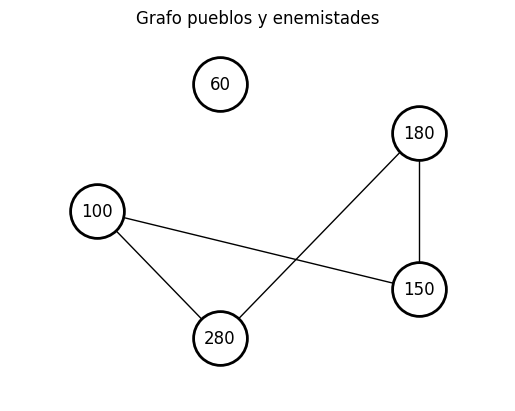

In [9]:
# Datos del problema
dic_nodos = {
    "1": 100,
    "2": 60,
    "3": 180,
    "4": 150,
    "5": 280,
}

enemistades = {
    "1": "4",
    "3": "5",
    "4": "3",
    "5": "1",
}

# Crear el grafo
crearGrafo(dic_nodos, enemistades, "Grafo pueblos y enemistades")



In [ ]:
#Definimos la variable x_i para cada nodo i.
X = {i: Binary(f'x_{i}') for i in dic_nodos} # {clave: valor for clave in iterable}

#Hamiltoniano natural
H_0 = sum(dic_nodos[i]*X[i] for i in dic_nodos) 

#Hamiltoniano de las restricciones
H_R = sum(-(dic_nodos[i]+ dic_nodos[enemistades[i]])*X[i]*X[enemistades[i]] for i in enemistades)

#Hamiltoniano total
H= -(H_0 + H_R)

model = H.compile()
bqm = model.to_bqm()

# Crear la matriz QUBO con eliminación debajo de la diagonal
matrizHamiltoniano(eliminar_bajo_diagonal=True)
ejecucionSimmulatedAnnealing(model, bqm, num_reads=10)


## Problema 1.1: Máximo Corte (Max-Cut) para un Grafo Pequeño

**Enunciado:**

Dado un grafo no dirigido $G = (V, E)$, donde $V$ es el conjunto de vértices y $E$ es el conjunto de aristas, encontrar una partición de los vértices en dos conjuntos $S$ y $V \setminus S$ tal que el número de aristas que cruzan la partición (es decir, que tienen un extremo en $S$ y el otro en $V \setminus S$) sea máximo.

**Instancia Específica:**

Considera un grafo simple con 4 vértices (A, B, C, D) y 5 aristas:

*   A - B
*   B - C
*   C - D
*   D - A
*   D - B

Este grafo es un ciclo de 4 vértices con una cuerda (arista A-C).

**Objetivo:**

1.  **Definir las variables binarias:** Asigna una variable binaria $x_i$ a cada vértice $i$, donde $x_i = 1$ si el vértice $i$ pertenece al conjunto $S$, y $x_i = 0$ si pertenece al conjunto $V \setminus S$.

2.  **Formular el problema como un QUBO:** Crea la matriz $Q$ del QUBO que representa la función objetivo a minimizar. Recuerda que el objetivo de Max-Cut se puede transformar en un problema de minimización equivalente.

3.  **Implementar el QUBO:** Utiliza un solver QUBO (por ejemplo, D-Wave Ocean SDK, Qiskit, SimAnneal, o Gurobi/CPLEX) para encontrar la asignación de variables que minimiza la función objetivo.

4.  **Interpretar los resultados:** Determina la partición de los vértices en los conjuntos $S$ y $V \setminus S$ basándote en la asignación de variables obtenida del solver.

5.  **Calcular el tamaño del corte:** Calcula el número de aristas que cruzan la partición encontrada.

**Consideraciones:**

*   Existen diferentes formulaciones QUBO para Max-Cut. Investiga y elige la que te parezca más adecuada.
*   El rendimiento del solver puede depender de la estructura específica del grafo y de los parámetros del solver.

**Sugerencias:**

*   Empieza escribiendo la función objetivo de Max-Cut en términos de las variables binarias $x_i$.
*   Luego, manipula la función objetivo para que tenga la forma estándar de un QUBO:  $\sum_{i} Q_{ii} x_i + \sum_{i<j} Q_{ij} x_i x_j$.
*   Verifica que la matriz $Q$ sea simétrica.

In [ ]:
import neal
from pyqubo import Spin

import numpy as np
import time

v = 4 # Numero de nodos
e = 5 # Numero de aristas

V = np.empty(v, dtype=object) 

######### Definimos las variables del problema #########

### x_i = Si es 1, el nodo i está en el conjunto S. Si es -1, el nodo i está en el conjunto V/S.

for i in range(v):              # Se crea diccionario. f'x{i}' es un f-string, genera una cadena de valor 'x' seguido de i.
    V[i]= Spin(f'x{i+1}')       # Spin('x1') es una variable binaria que puede tomar los valores -1 o 1.
    
Q = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 1, 0, 1],
              [1, 1, 1, 0]])

######### Construimos la función de coste = Hamiltoniano del sistema #########
H=0   
for i in range(v):
    for j in range(v):
        if i<j:
            H += -Q[i][j] + Q[i][j]*V[i]*V[j]


######### Compilamos el modelo #########
model = H.compile()
bqm = model.to_ising()        # Diccionario con los coeficientes de la función de costo.

linear = bqm[0]              # Bias lineal.
ising = bqm[1]               # Interacciones cuadraticas.
offset = bqm[2]              # Offset.

print("HAMILTONIANO DEL SISTEMA:")
print("-------------------------")
print("Interacciones (J):", ising)
print("Bias Lineal (h):", linear)
print("Offset:", offset)
print("")

######### Resolvemos el problema - Simulador Annealing #########
sampler = neal.SimulatedAnnealingSampler()                          # minimiza la energia del problema que se le proporcina. Si quieres maximizar f(x), minimiza -f(x).
t_inicial = time.time()
sampleset = sampler.sample_ising(linear, ising, num_reads=100)      #Ejecuta el algoritmo de optimización en el problema 100 veces. Devuelve un conjunto de muestras encontradas de minima energia.
t_final = time.time()
decoded_samples = model.decode_sampleset(sampleset)                 # decoded_samples contiene información similar a sampleset, pero en un formato más fácil de entender y usar.


######### Imprimimos los resultados #########
print("RESULTADOS:")
print("-------------------------")
best_sample = min(decoded_samples, key=lambda d: d.energy)          #min(iterable, key=func) fuc= lambda d: d.energy función anonima que se aplica a cada elemento d. devuelve la energia de cada elemeto.
print(best_sample)
print("")

execution_time_SimulatedAnnealing = t_final - t_inicial
rounded_time = redondeoDecimalesSignificativos(execution_time_SimulatedAnnealing,2)
print("Tiempo de ejecución de Simulated Annealing:", rounded_time, "segundos")
